In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
file_path = '/kaggle/input/top1000youtubers/youtubers_df.csv'
youtubers_df = pd.read_csv(file_path)
youtubers_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
youtubers_df.shape

(1000, 9)

# **Data Cleaning**

* **Check null values each columns**

In [4]:
null_youtubers_df = pd.DataFrame(youtubers_df.isna().sum().sort_values())
null_youtubers_df

,0
Rank,0
Username,0
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0
Categories,324


In [5]:
null_youtubers_df.rename(columns ={ 0 : 'null_count'}, inplace=True)
null_youtubers_df

,null_count
Rank,0
Username,0
Suscribers,0
Country,0
Visits,0
Likes,0
Comments,0
Links,0
Categories,324


In [6]:
null_youtubers_df['null_pct'] = null_youtubers_df['null_count']/youtubers_df.shape[0]*100
null_youtubers_df

,null_count,null_pct
Rank,0,0.0
Username,0,0.0
Suscribers,0,0.0
Country,0,0.0
Visits,0,0.0
Likes,0,0.0
Comments,0,0.0
Links,0,0.0
Categories,324,32.4


* **Replace null values of 'Categories' column**

In [7]:
youtubers_df['Categories'] = youtubers_df['Categories'].fillna('Unknown')

In [8]:
youtubers_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


* **Rename column name : 'Suscribers' -> 'Subscribers'**

In [9]:
youtubers_df.rename(columns= { 'Suscribers' : 'Subscribers'}, inplace=True)

# **Data Exploration** & **Data Visualization**

 # **1. **Distribution of subscribers, views, likes, and comments by boxplot.****

 **Descriptive Statistics**

In [10]:
youtubers_df.describe()

,Subscribers,Visits,Likes,Comments
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.260980e+07,1.063825e+06,4.917148e+04,1866.295000
std,1.733998e+07,3.729356e+06,2.107156e+05,20503.291953
min,1.230000e+07,0.000000e+00,0.000000e+00,0.000000
25%,1.430000e+07,3.310000e+04,4.792500e+02,3.000000
50%,1.730000e+07,1.932000e+05,3.400000e+03,70.000000
75%,2.442500e+07,8.844500e+05,3.080000e+04,458.250000
max,2.535000e+08,9.540000e+07,5.400000e+06,532000.000000


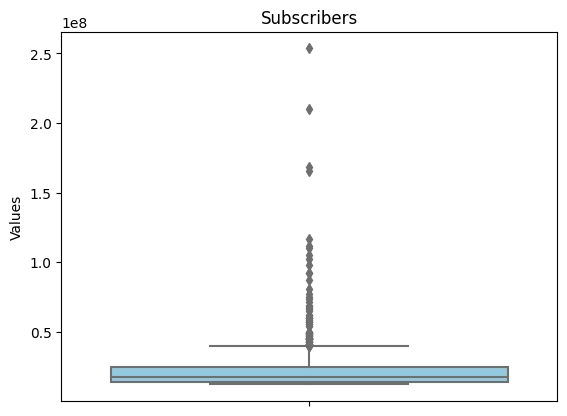

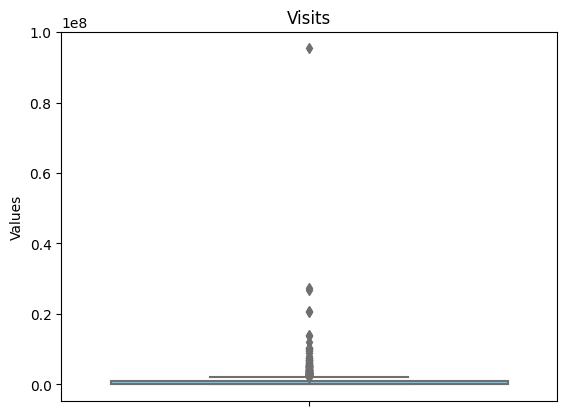

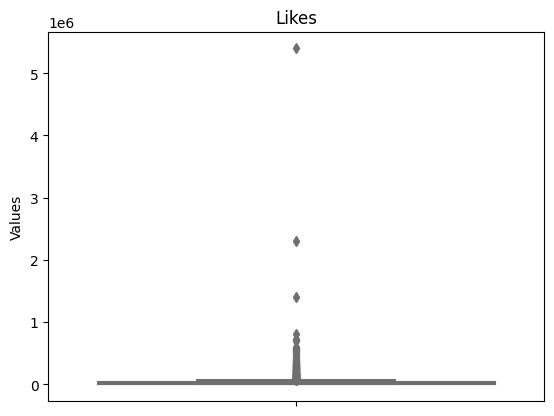

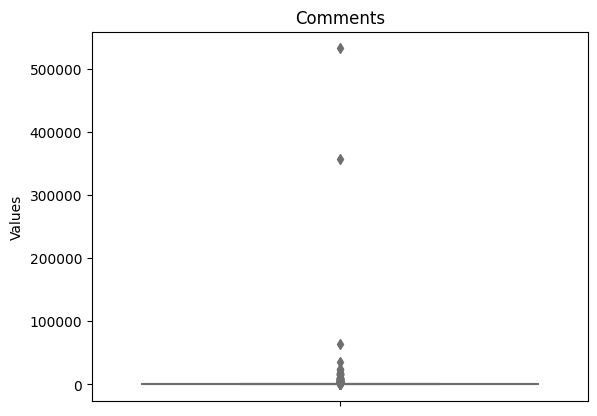

In [11]:
stat_youtubers_df = youtubers_df[['Subscribers', 'Visits', 'Likes', 'Comments']]

for col in stat_youtubers_df.columns:
    plt.figure()
    sns.boxplot(y=stat_youtubers_df[col], color='skyblue')
    plt.title(f'{col}')
    plt.ylabel('Values')
       
plt.show()

 # **2. Top 10 most popular Youtube channel (content) by viewers (Visits)**

In [12]:
top10_contents_youtubers_df = pd.DataFrame(youtubers_df[['Username', 'Categories', 'Visits']].sort_values('Visits', ascending=False).head(10).reset_index())
top10_contents_youtubers_df.rename(columns= {'Username':'Youtube channel', 'Categories':'Contents'}, inplace=True)
top10_contents_youtubers_df.reset_index()

del top10_contents_youtubers_df['index']
top10_contents_youtubers_df

,Youtube channel,Contents,Visits
0,MrBeast,"Videojuegos, Humor",95400000.0
1,DaFuqBoom,"Animación, Humor",27300000.0
2,realfoolsshorts63,Unknown,26700000.0
3,SidhuMooseWalaOfficial,Música y baile,20700000.0
4,MarkRober,Ciencia y tecnología,20400000.0
5,MartaAndRustam,Unknown,14100000.0
6,juliagisella,Unknown,13800000.0
7,ZachKing,"Películas, Humor",12100000.0
8,akshaynagwadiya,Unknown,10400000.0
9,BeastPhilanthropy,Comida y bebida,10300000.0


In [13]:
top10_contents_youtubers_df.to_csv('top10_Youtube_channel_contents_youtubers_df.csv')

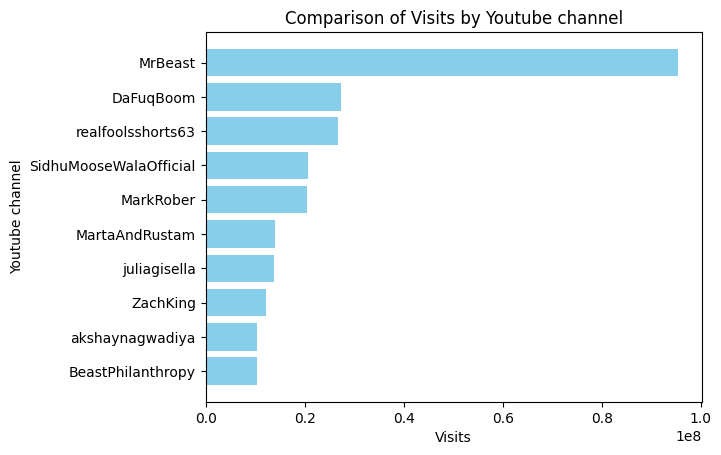

In [14]:
plt.barh(top10_contents_youtubers_df.sort_values('Visits', ascending=True)['Youtube channel'], top10_contents_youtubers_df.sort_values('Visits', ascending=True)['Visits'], color='skyblue')
plt.xlabel('Visits')
plt.ylabel('Youtube channel')
plt.title('Comparison of Visits by Youtube channel')
plt.show()


 # **3. Type of content do viewers in each country like the most**

In [15]:
unique_country = list(youtubers_df['Country'].unique())

In [16]:
len(unique_country)

30

In [17]:
# Content with the highest number of visits in each country
max_visits_by_country = youtubers_df.loc[youtubers_df.groupby('Country')['Visits'].idxmax()]

result = []
# Show result
for index, row in max_visits_by_country.iterrows():
    youtube_channel = row['Username']
    country = row['Country']
    category = row['Categories']
    visits =  row['Visits']
    likes = row['Likes']
    result.append({'Username': youtube_channel,'Country': country, 'Category': category, 'Visits': visits, 'Likes': likes})

max_visits_content_by_country = pd.DataFrame(result)\
                                  .sort_values('Visits', ascending=False)\
                                  .reset_index()

del max_visits_content_by_country['index']
max_visits_content_by_country.rename(columns= {'Username':'Youtube channel', 'Category':'Contents'}, inplace=True)
max_visits_content_by_country

,Youtube channel,Country,Contents,Visits,Likes
0,MrBeast,Estados Unidos,"Videojuegos, Humor",95400000.0,5400000.0
1,realfoolsshorts63,Unknown,Unknown,26700000.0,807900.0
2,SidhuMooseWalaOfficial,India,Música y baile,20700000.0,2300000.0
3,BadBunnyPR,México,"Música y baile, Películas",10100000.0,304700.0
4,alfredolarin,El Salvador,Unknown,9800000.0,538100.0
5,A4a4a4a4,Rusia,"Animación, Humor",9400000.0,274500.0
6,bigchungusYT,Argentina,Unknown,7400000.0,571600.0
7,Sidemen,Reino Unido,"Videojuegos, Humor",7400000.0,306300.0
8,RauwAlejandroTv,Perú,Música y baile,6800000.0,90500.0
9,shfa-1,Francia,Vlogs diarios,6600000.0,50000.0


In [18]:
max_visits_content_by_country.to_csv('max_visits_content_by_country.csv')

 # **4. Comparison of Subscribers, Visits, Likes, and Comments**

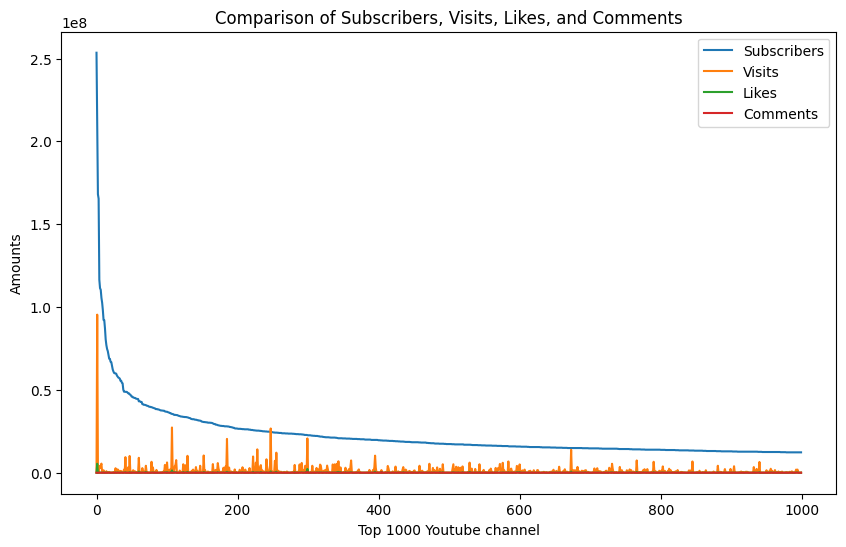

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(youtubers_df.index, youtubers_df['Subscribers'], label='Subscribers')
plt.plot(youtubers_df.index, youtubers_df['Visits'], label='Visits')
plt.plot(youtubers_df.index, youtubers_df['Likes'], label='Likes')
plt.plot(youtubers_df.index, youtubers_df['Comments'], label='Comments')

plt.xlabel('Top 1000 Youtube channel')
plt.ylabel('Amounts')
plt.title('Comparison of Subscribers, Visits, Likes, and Comments')
plt.legend()

plt.show()

 # **5. YouTube channels with the most engaged viewers.** 

In [20]:
youtubers_df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [21]:
# Select columns from youtubers_df

stat_youtubers_channel = pd.DataFrame(youtubers_df[['Username','Subscribers', 'Visits', 'Likes', 'Comments']]).reset_index()
engagement = pd.DataFrame(np.sum(youtubers_df[['Likes', 'Comments']], axis=1)).rename(columns= {0:'Engagement'}).reset_index()

In [22]:
# Merge DataFrame

stat_youtubers_engagement = pd.merge(stat_youtubers_channel, engagement, on='index').rename(columns= {'Username':'Youtube channel'})

In [23]:
# Created new columns : %EGM/Subs, %Visits/Subs, %EGM/Visits

stat_youtubers_engagement['%EGM/Subs'] = stat_youtubers_engagement['Engagement']/stat_youtubers_engagement['Subscribers']*100
stat_youtubers_engagement['%Visits/Subs'] = stat_youtubers_engagement['Visits']/stat_youtubers_engagement['Subscribers']*100
stat_youtubers_engagement['%EGM/Visits'] = stat_youtubers_engagement['Engagement']/stat_youtubers_engagement['Visits']*100


In [24]:
stat_youtubers_engagement.head()

,index,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,0,tseries,253500000.0,111300.0,3200.0,120.0,3320.0,0.001310,0.043905,2.982929
1,1,MrBeast,210100000.0,95400000.0,5400000.0,16600.0,5416600.0,2.578106,45.406949,5.677778
2,2,CoComelon,168100000.0,4100000.0,21600.0,0.0,21600.0,0.012849,2.439024,0.526829
3,3,SETIndia,165400000.0,23300.0,239.0,9.0,248.0,0.000150,0.014087,1.064378
4,4,KidsDianaShow,116500000.0,4100000.0,8800.0,0.0,8800.0,0.007554,3.519313,0.214634


# 5.1 Correlation variables : Subscribers, Visits, Engagement (Likes + Comments)

<Axes: >

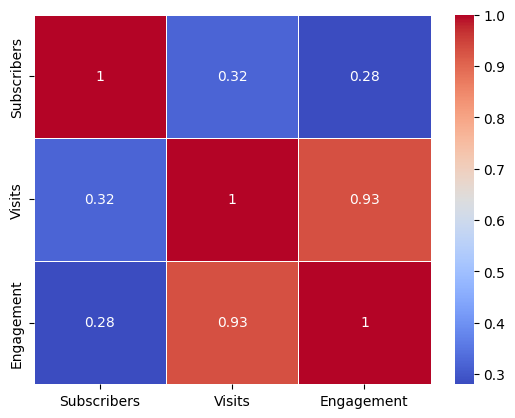

In [25]:
sns.heatmap(data=round(stat_youtubers_engagement[['Subscribers', 'Visits', 'Engagement']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

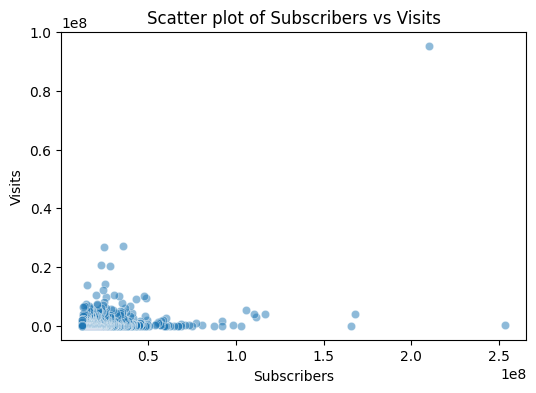

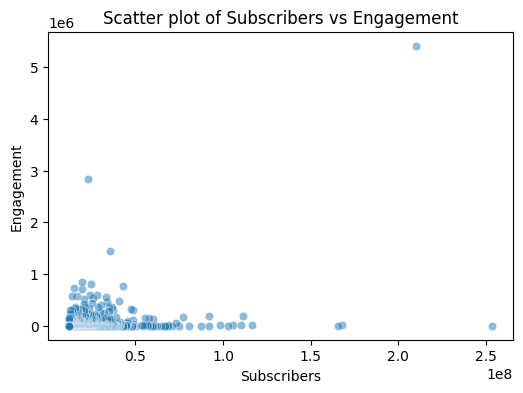

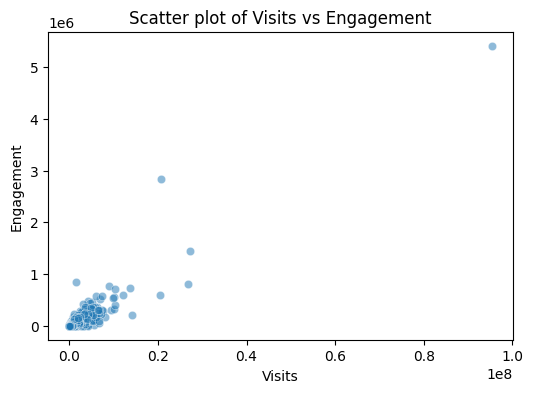

In [26]:
data1 = stat_youtubers_engagement
variables = ['Subscribers', 'Visits', 'Engagement']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data1, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

In [27]:
stat_youtubers_engagement[['Subscribers', 'Visits', 'Engagement']].describe()

,Subscribers,Visits,Engagement
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.260980e+07,1.063825e+06,5.103778e+04
std,1.733998e+07,3.729356e+06,2.195000e+05
min,1.230000e+07,0.000000e+00,0.000000e+00
25%,1.430000e+07,3.310000e+04,5.257500e+02
50%,1.730000e+07,1.932000e+05,3.604500e+03
75%,2.442500e+07,8.844500e+05,3.150375e+04
max,2.535000e+08,9.540000e+07,5.416600e+06


# 5.2 Correlation of : %Visits/Subs, %EGM/Visits, %EGM/Subs

<Axes: >

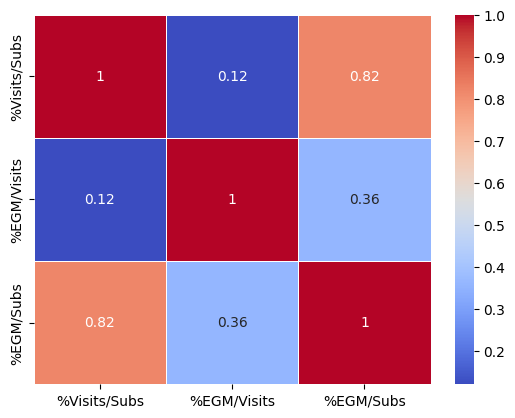

In [28]:
sns.heatmap(data=round(stat_youtubers_engagement[['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']].corr(),2),cmap='coolwarm',linewidth= 0.5,annot=True)

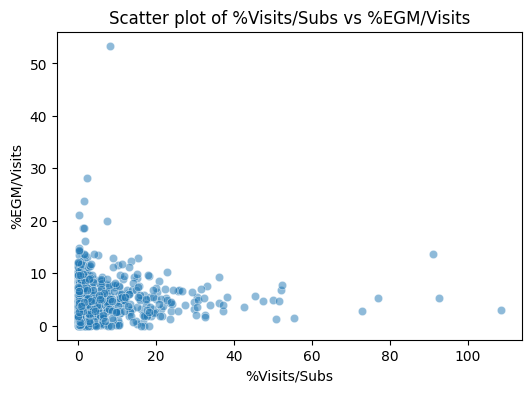

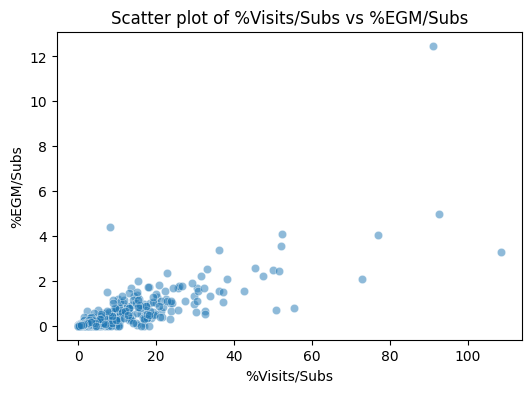

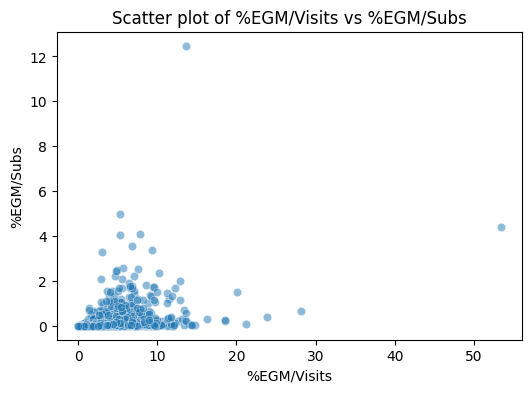

In [29]:
data1 = stat_youtubers_engagement
variables = ['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data1, x=variables[i], y=variables[j], alpha=0.5)
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.show()

In [30]:
stat_youtubers_engagement[['%Visits/Subs', '%EGM/Visits', '%EGM/Subs']].describe()

,%Visits/Subs,%EGM/Visits,%EGM/Subs
count,1000.000000,984.000000,1000.000000
mean,4.708942,3.918110,0.226896
std,9.902789,3.707541,0.636070
min,0.000000,0.000000,0.000000
25%,0.163366,1.544817,0.002323
50%,1.028105,3.073099,0.017630
75%,4.273521,5.380860,0.160890
max,108.536585,53.368750,12.475771


# 5.3 Youtube channels which have %Visits/Subs > 45%

In [31]:
data2 = stat_youtubers_engagement[ (stat_youtubers_engagement['%Visits/Subs'] > 45)]\
.sort_values(['%Visits/Subs'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')
data2

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,realfoolsshorts63,24600000.0,26700000.0,807900.0,2100.0,810000.0,3.292683,108.536585,3.033708
1,juliagisella,14900000.0,13800000.0,731800.0,6800.0,738600.0,4.957047,92.617450,5.352174
2,SidhuMooseWalaOfficial,22700000.0,20700000.0,2300000.0,532000.0,2832000.0,12.475771,91.189427,13.681159
3,DaFuqBoom,35500000.0,27300000.0,1400000.0,35900.0,1435900.0,4.044789,76.901408,5.259707
4,MarkRober,28000000.0,20400000.0,576800.0,9100.0,585900.0,2.092500,72.857143,2.872059
5,MartaAndRustam,25400000.0,14100000.0,200900.0,101.0,201001.0,0.791343,55.511811,1.425539
6,bigchungusYT,14100000.0,7400000.0,571600.0,4500.0,576100.0,4.085816,52.482270,7.785135
7,BeastPhilanthropy,19800000.0,10300000.0,690400.0,17000.0,707400.0,3.572727,52.020202,6.867961
8,golu008,12600000.0,6500000.0,308000.0,402.0,308402.0,2.447635,51.587302,4.744646
9,RauwAlejandroTv,13400000.0,6800000.0,90500.0,2800.0,93300.0,0.696269,50.746269,1.372059


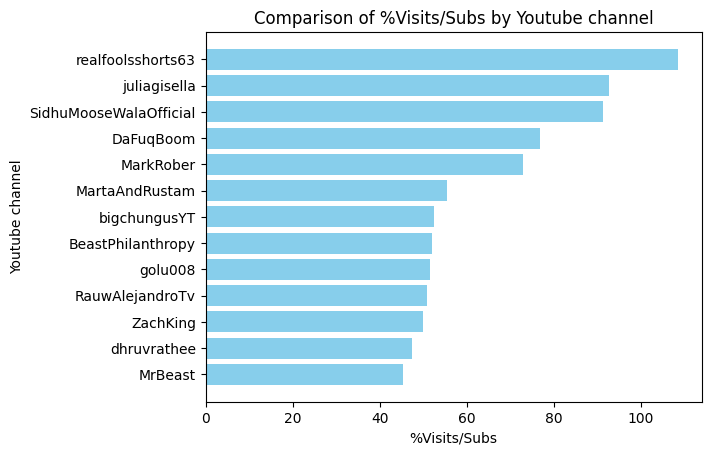

In [32]:
plt.barh(data2.sort_values('%Visits/Subs', ascending=True)['Youtube channel'], data2.sort_values('%Visits/Subs', ascending=True)['%Visits/Subs'], color='skyblue')
plt.xlabel('%Visits/Subs')
plt.ylabel('Youtube channel')
plt.title('Comparison of %Visits/Subs by Youtube channel')
plt.show()

# 5.4 Youtube channels which have %EGM/Visits > 10%

In [33]:
data3 = stat_youtubers_engagement[ (stat_youtubers_engagement['%EGM/Visits'] > 10)]\
.sort_values(['%EGM/Visits'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')
data3

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,BispoBrunoLeonardo,19500000.0,1600000.0,496900.0,357000.0,853900.0,4.378974,8.205128,53.368750
1,MelanieMartinez,15100000.0,344600.0,92700.0,4100.0,96800.0,0.641060,2.282119,28.090540
2,prantoniojunior,13500000.0,210900.0,48000.0,2200.0,50200.0,0.371852,1.562222,23.802750
3,Zayn,15700000.0,51900.0,10600.0,378.0,10978.0,0.069924,0.330573,21.152216
4,StrayKids,14800000.0,1100000.0,217900.0,2300.0,220200.0,1.487838,7.432432,20.018182
5,piuzinho,12700000.0,178800.0,32600.0,650.0,33250.0,0.261811,1.407874,18.596197
6,BTS,77000000.0,916400.0,166600.0,3400.0,170000.0,0.220779,1.190130,18.550851
7,TaylorSwift,55500000.0,951800.0,149800.0,4600.0,154400.0,0.278198,1.714955,16.221895
8,indorephysicalacademy.,15400000.0,26200.0,3800.0,68.0,3868.0,0.025117,0.170130,14.763359
9,NattiNatasha,12500000.0,24000.0,3300.0,152.0,3452.0,0.027616,0.192000,14.383333


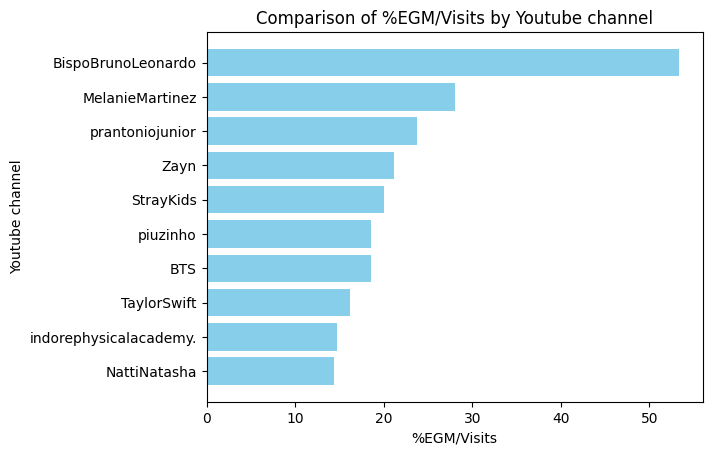

In [34]:
plt.barh(data3.head(10).sort_values('%EGM/Visits', ascending=True)['Youtube channel'], data3.head(10).sort_values('%EGM/Visits', ascending=True)['%EGM/Visits'], color='skyblue')
plt.xlabel('%EGM/Visits')
plt.ylabel('Youtube channel')
plt.title('Comparison of %EGM/Visits by Youtube channel')
plt.show()

# 5.5 Youtube channels which have %Visits/Subs > 45% and %EGM/Visits > 10%

In [35]:
stat_youtubers_engagement[ (stat_youtubers_engagement['%Visits/Subs'] > 45) & (stat_youtubers_engagement['%EGM/Visits'] > 10)]\
.sort_values(['%Visits/Subs'], ascending=False)\
.reset_index()\
.drop(columns= 'index')\
.drop(columns= 'level_0')

,Youtube channel,Subscribers,Visits,Likes,Comments,Engagement,%EGM/Subs,%Visits/Subs,%EGM/Visits
0,SidhuMooseWalaOfficial,22700000.0,20700000.0,2300000.0,532000.0,2832000.0,12.475771,91.189427,13.681159


# 6. In each country there are How many YouTubers are there? 

In [36]:
youtubers_df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [37]:
data4 = youtubers_df['Country'].value_counts().reset_index()
data4

,Country,count
0,Estados Unidos,291
1,India,244
2,Unknown,169
3,México,61
4,Brasil,58
5,Indonesia,40
6,Rusia,24
7,Tailandia,18
8,Filipinas,14
9,Colombia,14


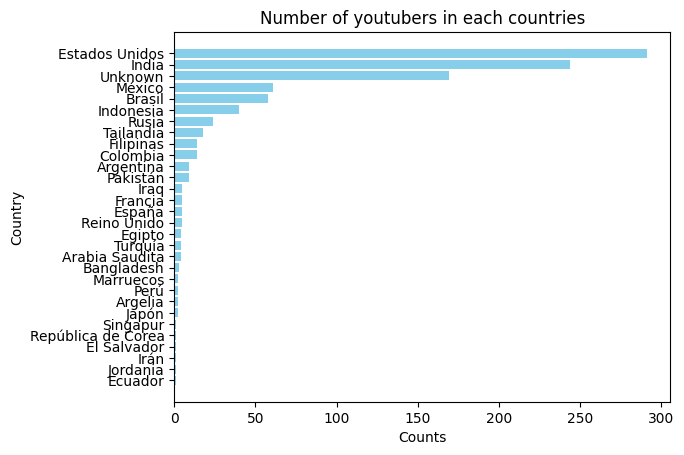

In [38]:
plt.barh(data4.sort_values('count', ascending=True)['Country'], data4.sort_values('count', ascending=True)['count'], color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Country')
plt.title('Number of youtubers in each countries')
plt.show()